In [107]:
import sys
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import shutil
import seaborn as sns

from os import listdir
from os.path import isfile, join

In [2]:
pwd()

'C:\\Users\\pckro\\Desktop\\fastai_practice\\notebooks\\dl1'

In [6]:
origData = pd.ExcelFile('GeneEx3-rawmjedit.xlsx')

In [8]:
origData.sheet_names

['rawData',
 'raw truncated',
 'CD8raw',
 'WHOLEraw',
 'ge3_ translation',
 'sorted_post_trans',
 'sorted for GSEA',
 'sortedPRFvXMG',
 'Whole spleen post trans',
 'wholePRFvXMG']

In [29]:
origData.parse('wholePRFvXMG').head()
data = origData.parse('wholePRFvXMG')
data.loc[data['GENE'] == 'IFNG']

,GENE,Pre-sortedPrfGL117,Pre-sortedPrfXMG
6721,IFNG,47.976,110.034


In [46]:
origData.parse('ge3_ translation').head()
data = origData.parse('ge3_ translation')
df = pd.DataFrame()
df['mouse'] = data.ix[:,0]
df['human'] = data.ix[:,1]
trans = df.set_index('mouse').T.to_dict('list') # https://stackoverflow.com/questions/26716616/convert-a-pandas-dataframe-to-a-dictionary


C:\Users\pckro\Anaconda3\envs\my-fastai2019\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\pckro\Anaconda3\envs\my-fastai2019\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


In [48]:
trans

{'0610007N19Rik': [nan],
 '0610007P14Rik': ['C14orf1'],
 '0610009B22Rik': [nan],
 '0610009D07Rik': [nan],
 '0610009L18Rik': [nan],
 '0610009O20Rik': ['KIAA0141'],
 '0610010B08Rik': ['ZNF442'],
 '0610010F05Rik': ['KIAA1841'],
 '0610010K14Rik': ['C17orf49'],
 '0610011F06Rik': [nan],
 '0610012G03Rik': [nan],
 '0610012H03Rik': [nan],
 '0610030E20Rik': ['C2orf68'],
 '0610031J06Rik': [nan],
 '0610031O16Rik': [nan],
 '0610037L13Rik': ['C1orf123'],
 '0610038B21Rik': [nan],
 '0610039K10Rik': [nan],
 '0610040B10Rik': [nan],
 '0610040F04Rik': [nan],
 '0610040J01Rik': ['C4orf19'],
 '0610043K17Rik': [nan],
 '1010001N08Rik': [nan],
 '1100001G20Rik': [nan],
 '1110001A16Rik': [nan],
 '1110001J03Rik': [nan],
 '1110002L01Rik': [nan],
 '1110004E09Rik': ['C21orf59'],
 '1110004F10Rik': ['C11orf58'],
 '1110006O24Rik': [nan],
 '1110007C09Rik': [nan],
 '1110008F13Rik': ['C20orf24'],
 '1110008J03Rik': [nan],
 '1110008L16Rik': ['KIAA0391'],
 '1110008P14Rik': ['C9orf16'],
 '1110012L19Rik': ['CXorf40A'],
 '111001

In [31]:
data.to_csv('forGSEA.txt', sep='\t', index=False)

In [54]:
def gethumanGene(mouseGene) :
    try :
        return trans.get(mouseGene)[0]
    except :
        return None

In [71]:
data = pd.read_excel('TPM-summary.xlsx')
data['Gene'] = data['Gene'].apply(lambda mouseGene: gethumanGene(mouseGene) ) # https://stackoverflow.com/questions/34962104/pandas-how-can-i-use-the-apply-function-for-a-single-column
data = data.dropna()
data = data[['Gene', 'PrfGL117HostGeneTPM', 'Prf XMG host Gene TPM']]
data.to_csv('forGSEA_sorted.txt', sep='\t', index=False)

In [148]:
gseaSpleen = pd.read_csv('gseaSPLEEN.csv', sep='\t')
gseaSpleen = gseaSpleen[['NAME', 'NES', 'NOM p-val', 'FDR q-val']]
gseaSpleen['NES'] = gseaSpleen['NES'] * -1
gseaSpleen

,NAME,NES,NOM p-val,FDR q-val
0,HALLMARK_HEME_METABOLISM,2.252437,0.000000,0.000000
1,HALLMARK_E2F_TARGETS,2.023193,0.000000,0.001513
2,HALLMARK_G2M_CHECKPOINT,1.808316,0.000000,0.020369
3,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,1.728694,0.000000,0.029858
4,HALLMARK_ANGIOGENESIS,1.538724,0.041218,0.089205
5,HALLMARK_MYC_TARGETS,1.505674,0.006673,0.078514
6,HALLMARK_MYOGENESIS,1.478510,0.007498,0.082153
7,HALLMARK_APICAL_SURFACE,1.401935,0.078760,0.117449
8,HALLMARK_ESTROGEN_RESPONSE_LATE,1.353616,0.030373,0.139974
9,HALLMARK_HEDGEHOG_SIGNALING,1.330264,0.102625,0.146983


In [149]:
gseaCD8 = pd.read_csv('gseaCD8.csv', sep='\t')
gseaCD8 = gseaCD8[['NAME', 'NES', 'NOM p-val', 'FDR q-val']]
gseaCD8['NES'] = gseaCD8['NES'] * -1
gseaCD8

,NAME,NES,NOM p-val,FDR q-val
0,HALLMARK_HEME_METABOLISM,2.139373,0.000000,0.000000
1,HALLMARK_INFLAMMATORY_RESPONSE,1.670455,0.000000,0.048642
2,HALLMARK_MYC_TARGETS,1.644565,0.000442,0.043546
3,HALLMARK_MTORC1_SIGNALING,1.573752,0.000000,0.064546
4,HALLMARK_ALLOGRAFT_REJECTION,1.571559,0.000886,0.052805
5,HALLMARK_COAGULATION,1.555453,0.003595,0.050033
6,HALLMARK_INTERFERON_GAMMA_RESPONSE,1.529326,0.002977,0.055435
7,HALLMARK_INTERFERON_ALPHA_RESPONSE,1.452430,0.027467,0.093221
8,HALLMARK_APICAL_JUNCTION,1.416563,0.012304,0.111609
9,HALLMARK_GLYCOLYSIS,1.346977,0.024869,0.172465


In [154]:
gsea_res = gseaCD8
p_thresh = 0.15
q_thresh = 1

In [177]:
def getSig(gsea_res, p_thresh = 0.1, q_thresh = 1) :
    is_sig = (gsea_res['NOM p-val'] < p_thresh) & (gsea_res['FDR q-val'] < q_thresh)
    return gsea_res[is_sig]
def isSig(gsea_res, p_thresh = 0.1, q_thresh = 1) :
    return (gsea_res['NOM p-val'] < p_thresh) & (gsea_res['FDR q-val'] < q_thresh)


In [208]:
def show_chart(res_all,orderedNames,orderList = None, drop_inSignificant=True):
    print(orderList)
    drop_inSignificant = True
    print_frame = None
    if orderList == None:
        print_frame = res_all[0][1].copy()
        print_frame = print_frame[['NAME']]
    else: 
        print_frame = pd.DataFrame({'NAME':orderList})
        
    print(print_frame)
    for sample_name, res in res_all:
        print(sample_name)
        #print(res)
        if drop_inSignificant :
            res = getSig(res)
        res[sample_name+'-NES'] = res['NES']
        #print(res)
        print_frame = pd.merge(print_frame, res[['NAME',sample_name+'-NES']], on='NAME', how='outer')
    #print(print_frame)
    print_frame = print_frame.dropna(subset=['Spleen-NES', 'CD8-NES'], how='all')
    print_frame = print_frame.rename({'NAME':'Pathway'}, axis=1)
    print(print_frame)
    short_path = []
    for pathway in print_frame['Pathway']:
        short_path.append(pathway[9:])
    print_frame['Pathway'] = short_path
    print_frame.index = print_frame['Pathway']
    #print(print_frame)

    
    names = orderedNames
    for sample_name, res in res_all:
        names.append(sample_name+'-NES')
    names = set(names)
    names = names.intersection(print_frame.columns)
    print(names)
    names = ['Spleen-NES', 'CD8-NES']
    print_frame = print_frame[names]
    print(print_frame)
    if orderList == None :
        print_frame = print_frame.sort_values(by=print_frame.columns[0], ascending=False)
    mask = print_frame.isna()

    print(print_frame)
    plt.figure(figsize=(10, 16))
    g = sns.heatmap(print_frame, square=True,yticklabels=True, center=0, cmap='RdBu_r')
    g.set_facecolor('black')
    return g

None
                                          NAME
0                     HALLMARK_HEME_METABOLISM
1                         HALLMARK_E2F_TARGETS
2                      HALLMARK_G2M_CHECKPOINT
3   HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION
4                        HALLMARK_ANGIOGENESIS
5                         HALLMARK_MYC_TARGETS
6                          HALLMARK_MYOGENESIS
7                      HALLMARK_APICAL_SURFACE
8              HALLMARK_ESTROGEN_RESPONSE_LATE
9                  HALLMARK_HEDGEHOG_SIGNALING
10                   HALLMARK_MTORC1_SIGNALING
11                    HALLMARK_MITOTIC_SPINDLE
12                    HALLMARK_APICAL_JUNCTION
13                     HALLMARK_UV_RESPONSE_DN
14              HALLMARK_FATTY_ACID_METABOLISM
15            HALLMARK_ESTROGEN_RESPONSE_EARLY
16          HALLMARK_UNFOLDED_PROTEIN_RESPONSE
17                         HALLMARK_GLYCOLYSIS
18                HALLMARK_PANCREAS_BETA_CELLS
19                  HALLMARK_KRAS_SIGNALING_DN
20      

C:\Users\pckro\Anaconda3\envs\my-fastai2019\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


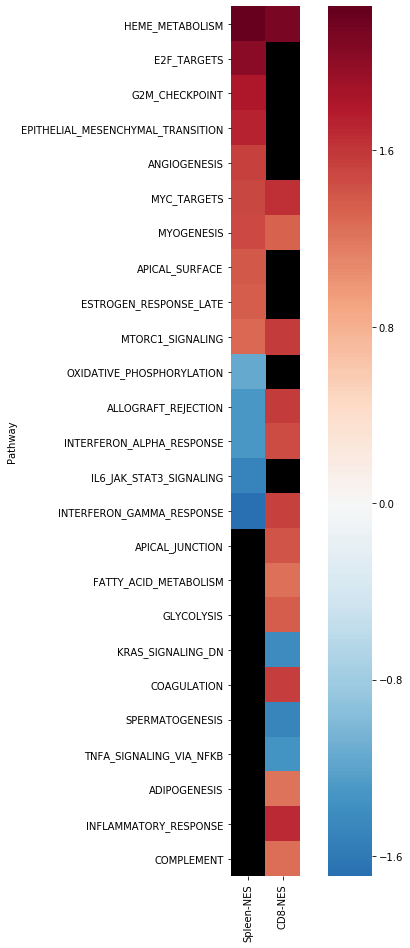

In [209]:
res_all = [
    ('Spleen', gseaSpleen),    
    ('CD8', gseaCD8)
]
orderedNames = ['Spleen', 'CD8']



show_chart(res_all, orderedNames)

['HALLMARK_E2F_TARGETS', 'HALLMARK_G2M_CHECKPOINT', 'HALLMARK_MYC_TARGETS', 'HALLMARK_MITOTIC_SPINDLE', 'HALLMARK_DNA_REPAIR', 'HALLMARK_HEDGEHOG_SIGNALING', 'HALLMARK_APICAL_SURFACE', 'HALLMARK_APICAL_JUNCTION', 'HALLMARK_MYOGENESIS', 'HALLMARK_ADIPOGENESIS', 'HALLMARK_KRAS_SIGNALING_DN', 'HALLMARK_UNFOLDED_PROTEIN_RESPONSE', 'HALLMARK_FATTY_ACID_METABOLISM', 'HALLMARK_OXIDATIVE_PHOSPHORYLATION', 'HALLMARK_MTORC1_SIGNALING', 'HALLMARK_GLYCOLYSIS', 'HALLMARK_IL2_STAT5_SIGNALING', 'HALLMARK_ALLOGRAFT_REJECTION', 'HALLMARK_COAGULATION', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_COMPLEMENT', 'HALLMARK_INTERFERON_ALPHA_RESPONSE', 'HALLMARK_INFLAMMATORY_RESPONSE', 'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_IL6_JAK_STAT3_SIGNALING']
                                  NAME
0                 HALLMARK_E2F_TARGETS
1              HALLMARK_G2M_CHECKPOINT
2                 HALLMARK_MYC_TARGETS
3             HALLMARK_MITOTIC_SPINDLE
4                  HALLMARK_DNA_REPAIR
5          HALLMARK_

C:\Users\pckro\Anaconda3\envs\my-fastai2019\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


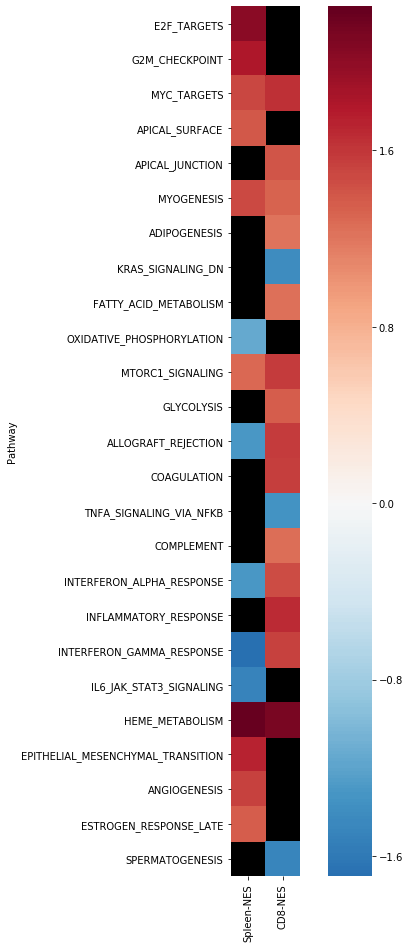

In [212]:
orderList = "\
HALLMARK_E2F_TARGETS \
HALLMARK_G2M_CHECKPOINT \
HALLMARK_MYC_TARGETS \
HALLMARK_MITOTIC_SPINDLE \
HALLMARK_DNA_REPAIR \
HALLMARK_HEDGEHOG_SIGNALING \
HALLMARK_APICAL_SURFACE \
HALLMARK_APICAL_JUNCTION \
HALLMARK_MYOGENESIS \
HALLMARK_ADIPOGENESIS \
HALLMARK_KRAS_SIGNALING_DN \
HALLMARK_UNFOLDED_PROTEIN_RESPONSE \
HALLMARK_FATTY_ACID_METABOLISM \
HALLMARK_OXIDATIVE_PHOSPHORYLATION \
HALLMARK_MTORC1_SIGNALING \
HALLMARK_GLYCOLYSIS \
HALLMARK_IL2_STAT5_SIGNALING \
HALLMARK_ALLOGRAFT_REJECTION \
HALLMARK_COAGULATION \
HALLMARK_TNFA_SIGNALING_VIA_NFKB \
HALLMARK_COMPLEMENT \
HALLMARK_INTERFERON_ALPHA_RESPONSE \
HALLMARK_INFLAMMATORY_RESPONSE \
HALLMARK_INTERFERON_GAMMA_RESPONSE \
HALLMARK_IL6_JAK_STAT3_SIGNALING \
"

orderList = orderList.split()
g = show_chart(res_all, orderedNames, orderList=orderList)
(g.get_figure()).savefig('ForVandana-heatmap.png')